<a href="https://colab.research.google.com/github/FeCamarinha/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [fecamarinha](https://www.linkedin.com/in/fernanda-seraphim-camarinha/)*

---

# Análise dos Dados do Airbnb - *Zurich - Suíça*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Zurich, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados utilizados estão no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e para nossa análise, que é inicial, utilizaremos o seguinte arquivo:

*   	[listings.csv](http://data.insideairbnb.com/switzerland/z%C3%BCrich/zurich/2021-06-30/visualisations/listings.csv) - 	Summary information and metrics for listings in Zurich (good for visualisations)

Importante: Como os dados do site estão em constante atualização, o que utilizamos aqui são de 30 Junho de 2021, disponibizaremos [aqui](https://drive.google.com/drive/folders/1KVywcVYBLs1smwYkaHhrlbGfc2BfgnoS?usp=sharing) os dados utilizados, assim você poderá replicar o material com os dados originais.


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/FeCamarinha/Data-Science/main/Airbnb")

## Análise dos Dados
Nesta etapa analisaremos quais os dados para compreenção geral das informações a que teremos acesso

**Dicionário das variáveis**

* id - número identificador
* name - anúncio do imóvel
* host id - identificador do proprietário
* host_name - nome do proprietário do imóvel
* neighbourhood_group - área da cidade, Zurich é dividida em 12 Kreis	
* neighbourhood - bairro	
* latitude - latitude da localização do imóvel
* longitude - longitude da localização do imóvel	
* room_type	- tipo de acomodação
* price	- custo do aluguel da propriedade
* minimum_nights - quantidade minima de noites que podem ser reservadas	
* number_of_reviews	- número de avaliações
* last_review	- data da última avaliação
* reviews_per_month	- avaliações por mês
* calculated_host_listings_count	- quantidade de imóveis do mesmo proprietário
* availability_365 - número de disponibilidade, nos próximos 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.37374,8.51957,Entire home/apt,100,3,49,2019-03-28,0.46,1,0
1,86645,Stadium Letzigrund - by Airhome,475053,James,Kreis 3,Sihlfeld,47.38038,8.50461,Entire home/apt,180,1,49,2017-10-24,0.53,18,179
2,143821,marvelous LOFT in SIHLCITY Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.35724,8.52304,Entire home/apt,200,3,0,NaN,NaN,1,276
3,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.36565,8.52753,Private room,60,5,9,2016-05-10,0.14,1,108
4,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.40656,8.48465,Private room,200,3,0,NaN,NaN,1,364


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame - para saber o número de entradas determinaremos o número de linhas, 
#para saber o número de variáveis determinaremos o número de colunas através do método .shape 
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	1828
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Avaliaremos a qualidade de nossa base de dados, como estamos utilizando a versão "simplificada" do arquivo não teremos muitos dados, nesse sentido, embora facilite a análise, nosso espaço amostral se reduz. Portanto, neste nosso estudo entender a proporção de valores ausentes torna-se relevante.
Nosso dataset apresenta ótima qualidade! Apenas 4 colunas apresentam valores ausentes, duas delas relevantes:

* A Coluna de avaliações por mês apresentam 23,8% de valores nulos, o que, inicialmente não é um problema, um imóvel pode ficar mais de um mês sem visitação ou o hóspede pode optar por não avaliar;
* A coluna da data da última avaliação apresenta 23,8% de valores nulos, identico ao anterior, o que pode nos indicar que foram imóvei que ficaram vazios durante o mês (podemos verificar essa hipótese na análise);


In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.235777
last_review                       0.235777
host_name                         0.002188
name                              0.000547
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

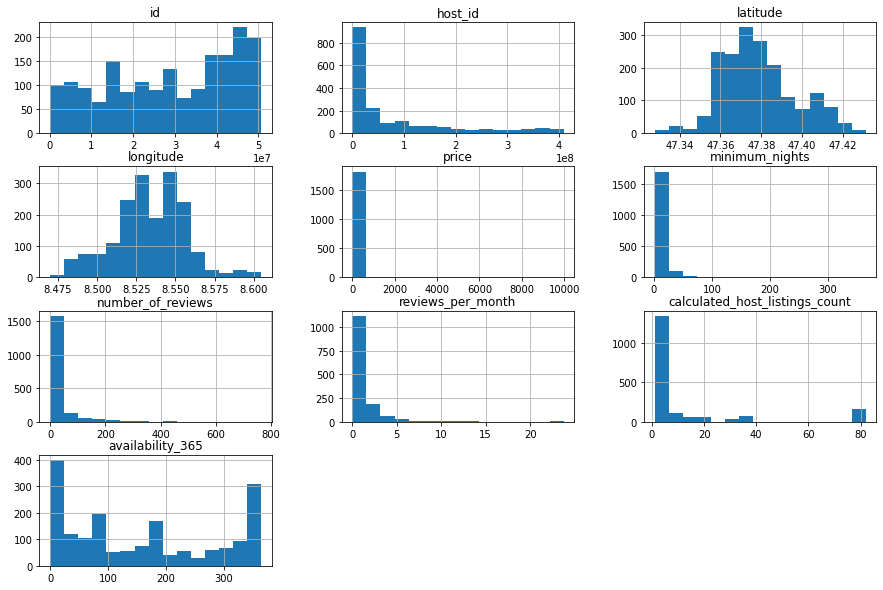

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Quando determinamos a média da variável preço obtemos $ 167.99, entretanto o dado "cru" talvez não seja a melhor forma de verificar essa média, podemos notar pelo histograma gerado que algumas variáveis não apresentam distribuições e aparentemente estão distorcidas por outliers.

Dado esse fato o ideal para nossa análise será desconsiderar os outliers e aí sim determinar a média de preços.


In [14]:
# ver a média da coluna `price``
df.price.mean()

167.98960612691465

In [16]:
# tratamento de outliers para 'price'
df['price'].describe()

count    1828.000000
mean      167.989606
std       380.074179
min         0.000000
25%        70.000000
50%       103.500000
75%       165.000000
max      9974.000000
Name: price, dtype: float64

Notamos no resumo estatístico acima que:
* A varíavel price possuí 75% dos valores abaixo de 165, mas seu valor máximo é de 9.974

Vamos agora utilizar um Boxplot para price



price: valores acima de 1000
10 entradas
0.5470%


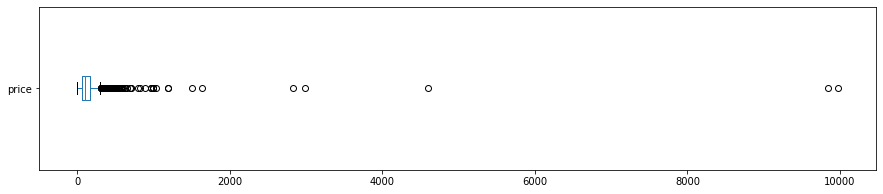

In [139]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show;

print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

Notamos clara distorção, temos poucos valores acima de 2000.
Nesse ponto precisamos tomar cuidado - esses 7 valores destoam da distribuição e podem distorcer nossa análise, portanto vamos gerar um dataset sem esses valores

In [141]:
# Gerar um DataFrame sem os valores distrocidos
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>1000].index, axis = 0, inplace=True)
df_clean.price.mean()

148.68536853685367

**Concluímos pela nossa análise que o preço médio do imóvel em Zurich é de 148.7 dólares por noite.**

### **Q4. Qual a correlação existente entre as variáveis**

Para entender a relação entre as variáveis vamos gerar as correlações entre estas. Quando mais próximo de 1, maior é a correlção.
Para gerar essa informação consideraremos algumas variáveis de interesse - 'price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'

In [142]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.009511,-0.042384,-0.056023,0.151229,0.086917
minimum_nights,-0.009511,1.000000,-0.076683,-0.098173,-0.022063,0.071641
number_of_reviews,-0.042384,-0.076683,1.000000,0.641900,-0.009066,-0.007919
reviews_per_month,-0.056023,-0.098173,0.641900,1.000000,-0.052000,-0.050818
calculated_host_listings_count,0.151229,-0.022063,-0.009066,-0.052000,1.000000,0.098824
availability_365,0.086917,0.071641,-0.007919,-0.050818,0.098824,1.000000


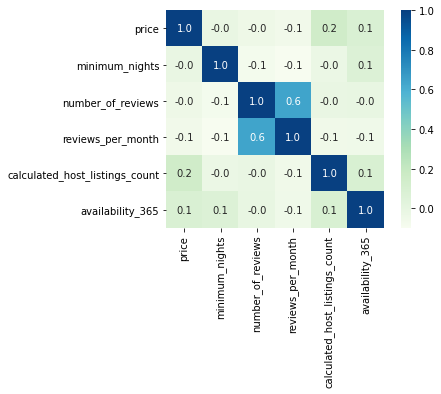

In [143]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='GnBu', fmt='.1f', square=True, linecolor='black', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb em Zurich?**

Agora vamos dar uma olhada no tipo de imóvel mais alugado em Zurich, nossa base de dados mostra que casa inteira ou apartamentos é a modalidade mais disponível na cidade, repesentando ~ 66% da base de imóveis do Airbnb.

In [144]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts(ascending=False)


Entire home/apt    1204
Private room        597
Shared room          17
Hotel room           10
Name: room_type, dtype: int64

In [145]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/ df.shape[0]


Entire home/apt    0.658643
Private room       0.326586
Shared room        0.009300
Hotel room         0.005470
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Pare determinarmos a localidade mais cara, utilizaremos nosso Dataframe com o tratamento de outliers. Mas antes disso, vamos descrever nossa variável - temos 1818 entradas de dados, sendo que o bairro que mais tem imóveis é Langstrasse. Temos também 34 entradas únicas, o que nos aponta que a simples análise de média de preços por bairros, pode não ser a ideal para determinação do bairro mais caro. Nesse sentido, talvez uma abordagem interessante seria a de tratar os dados no detalhe: (i) verificando se temos entradas de dados suficientes por bairro, bem como (ii) o tratamento de outliers de preço por bairro.

Os bairros que apresentam as médias mais caras são: City, Altstetten e Albisrieden. Sendo que City possuem 22, 117 e 35 propriedades respectivamente. Portanto, precisamos tomar cuidado com conclusões sobre o preço desses bairros uma vez que algum deles apresentam poucas propriedades.



In [146]:
df_clean.neighbourhood.describe()

count            1818
unique             34
top       Langstrasse
freq              126
Name: neighbourhood, dtype: object

In [147]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
City                    337.272727
Altstetten              233.358333
Albisrieden             232.400000
Lindenhof               208.558824
Rathaus                 200.329268
Seefeld                 191.489583
Unterstrass             161.746479
Langstrasse             159.007937
Oerlikon                157.983333
Escher Wyss             157.375000
Weinegg                 151.950000
Hochschulen             139.833333
Wollishofen             137.117647
Mühlebach               133.740260
Fluntern                133.720930
Hottingen               130.590164
Werd                    129.308824
Sihlfeld                125.806122
Enge                    122.637500
Hirslanden              122.292683
Höngg                   120.810811
Oberstrass              119.613636
Hard                    117.614035
Witikon                 114.518519
Alt-Wiedikon            114.484211
Seebach                 113.597222
Gewerbeschule           112.285714
Friesenberg             103.307692
Saatle

In [157]:
df_clean.neighbourhood.value_counts()

Langstrasse             123
Oerlikon                118
Altstetten              117
Seefeld                  96
Alt-Wiedikon             95
Sihlfeld                 93
Rathaus                  82
Enge                     80
Mühlebach                76
Seebach                  72
Unterstrass              68
Werd                     68
Gewerbeschule            63
Hottingen                61
Hard                     57
Wipkingen                55
Wollishofen              50
Oberstrass               42
Fluntern                 42
Hirslanden               39
Albisrieden              35
Höngg                    35
Lindenhof                34
Escher Wyss              32
Witikon                  27
Affoltern                23
City                     22
Hirzenbach               20
Weinegg                  20
Friesenberg              13
Hochschulen              12
Schwamendingen-Mitte     12
Saatlen                   5
Leimbach                  3
Name: neighbourhood, dtype: int64

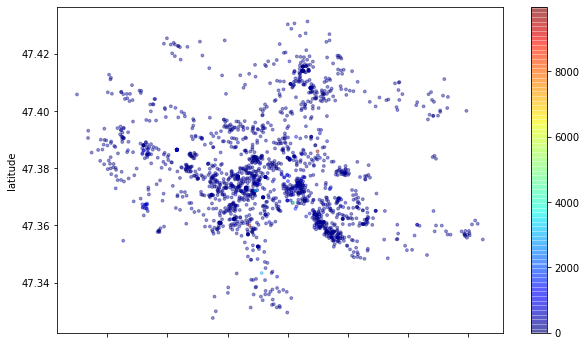

In [148]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'],s=8,
        cmap=plt.get_cmap('jet'),figsize=(10,6), );


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Com base nos histogramas podemos perceber que a variável minimum_nights possui distorções, por isso iremos verificar se também é o caso de desconsiderarmos alguns outliers para análise da média.

In [115]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

7.160284463894967

In [126]:
# descrever a variável para determinar outliers
df.minimum_nights.describe()

count    1828.000000
mean        7.160284
std        21.190357
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       365.000000
Name: minimum_nights, dtype: float64

Verificamos que até 75% dos valores são <= a 5 sendo que o valor máximo é de 365 o que nos indica a existência de ouliers, como desconfiávamos. Vamos excluír os outliers por prevenção.

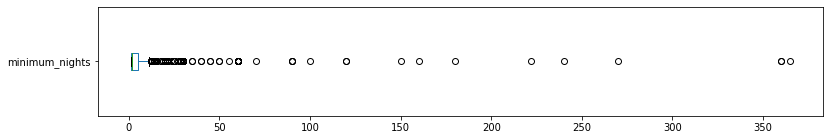


minimum_nights: valores acima de 50
28 entradas
1.5317%


In [149]:
df.minimum_nights.plot(kind='box',vert=False, figsize=(13,2))
plt.show()
print("\nminimum_nights: valores acima de 50")
print("{} entradas".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))

In [154]:
df_clean2 = df.copy()
df_clean2.drop(df_clean[df_clean.price>1000].index, axis = 0, inplace=True)
df_clean2.drop(df_clean[df_clean.minimum_nights>50].index, axis = 0, inplace=True)
df_clean2.minimum_nights.mean()

7.160284463894967

A média de estadia para Zurich é de 7 dias, os usuários costumam alugar os imóveis por uma semana.

## Conclusões


Nossa análise inicial, mesmo que superficial nos permite chegar em algumas conclusões. No geral, os usuários do Airbnb costumam ficar em média 7 dias em Zurich, esse resultado faz sentido uma vez que a cidade é conhecida por ser um centro global bancário e financeiro e costuma sediar muitos eventos na área.

O preço médio de estadia é 148.7 francos suíços, o que na cotação de hoje (07-08-2021) daria 856.51 reais, muito próximo do valor médio de uma estadia em hotel 3 estrelas na cidade, que é de 852 reais [Link da informação](https://search.google.com/local/places/hotel/categorical?q=Z%C3%BCrich+hotels&hotel_mode=1&sa=X&ved=2ahUKEwj4i43V1Z_yAhUxqZUCHeL5AwcQri4wKHoECC0QBQ)
